<a href="https://colab.research.google.com/github/mscharan-analytics/Customer-Churn-Analysis/blob/main/QWE_Case_Study_on_Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**QWE Case Study on Customer Churn Analysis**<center>

## <center>By : Sricharan Mahavadi</center>

## Introduction

Greetings! I'm stepping into the shoes of V.J. Aggrawal, the data scientist on a mission to crack the code of customer churn at company QWE. Armed with a dataset curated by Aggrawal, packed with state and "delta" variables, my goal is to whip up a logistic regression model. This model isn't just about numbers; it's the key to unraveling patterns and understanding why customers bid farewell. Together, we're diving into the data to unearth insights that will arm company QWE with the knowledge to tackle customer departures head-on. Let's decode the churn puzzle and set the stage for strategic decisions!

Importing Necessary Packages

In [ ]:
import pandas as pd
import missingno as msno
from datetime import datetime as dt
import seaborn as sns
import plotly.subplots as sp
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import plotly.express as px
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

##Dataload

In [ ]:
df=pd.read_excel('UV6696-XLS-ENG.xlsx',sheet_name='Case Data')

In [ ]:
#creating a copy of the dataset
df_copy = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          6347 non-null   int64  
 1   Customer Age (in months)    6347 non-null   int64  
 2   Churn (1 = Yes, 0 = No)     6347 non-null   int64  
 3   CHI Score Month 0           6347 non-null   int64  
 4   CHI Score 0-1               6347 non-null   int64  
 5   Support Cases Month 0       6347 non-null   int64  
 6   Support Cases 0-1           6347 non-null   int64  
 7   SP Month 0                  6347 non-null   float64
 8   SP 0-1                      6347 non-null   float64
 9   Logins 0-1                  6347 non-null   int64  
 10  Blog Articles 0-1           6347 non-null   int64  
 11  Views 0-1                   6347 non-null   int64  
 12   Days Since Last Login 0-1  6347 non-null   int64  
dtypes: float64(2), int64(11)
memory u

##Exploratory Data Analysis

Let us look into the class division within the dataset

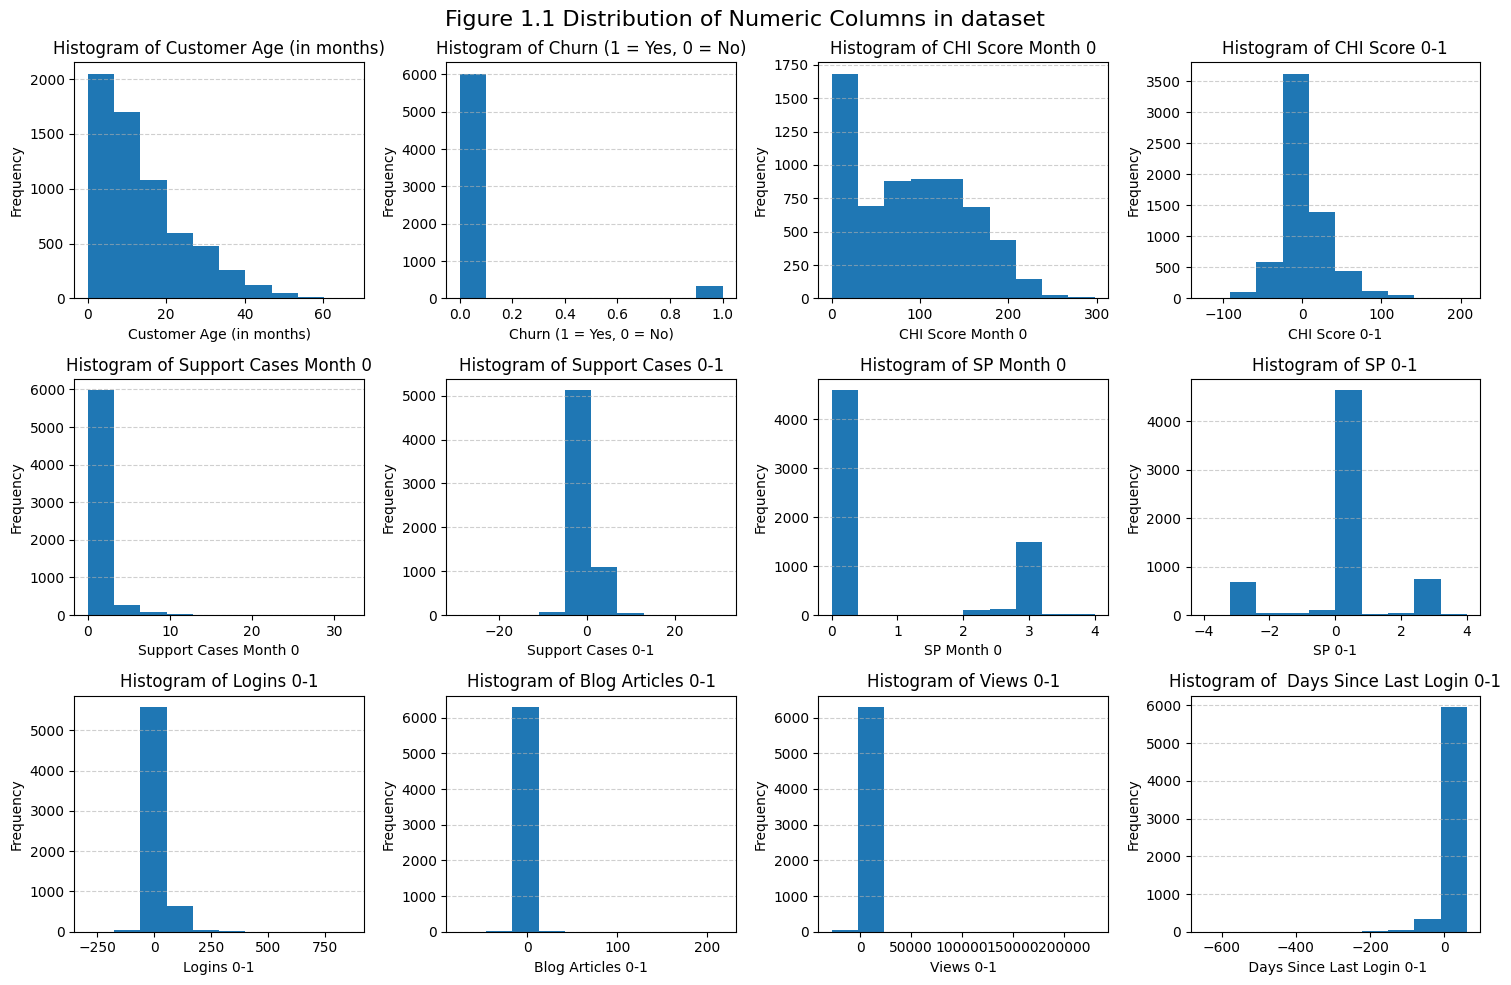

In [ ]:
numeric_columns = df[['Customer Age (in months)','Churn (1 = Yes, 0 = No)','CHI Score Month 0','CHI Score 0-1',
                      'Support Cases Month 0','Support Cases 0-1','SP Month 0','SP 0-1','Logins 0-1','Blog Articles 0-1',
                      'Views 0-1',' Days Since Last Login 0-1']]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.ravel()

fig.suptitle('Figure 1.1 Distribution of Numeric Columns in dataset', fontsize=16)

for i, col in enumerate(numeric_columns):
    axes[i].hist(df[col], bins=10)
    axes[i].set_title(f'Histogram of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)


for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()


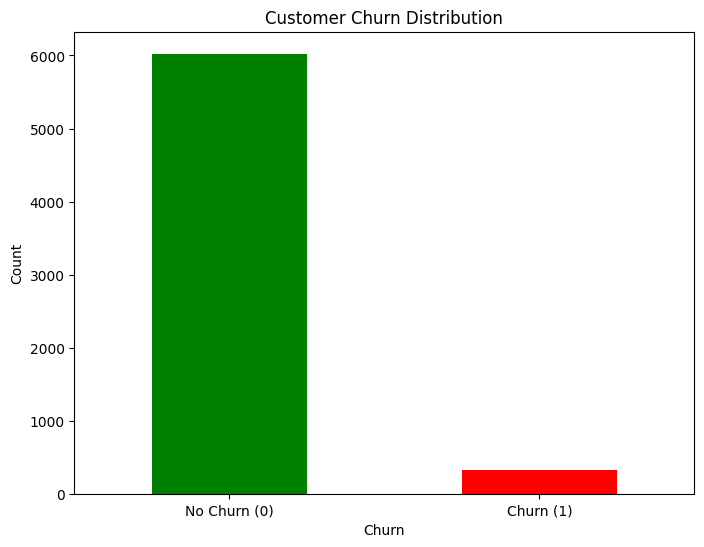

In [ ]:
plt.figure(figsize=(8, 6))
churn_counts = df['Churn (1 = Yes, 0 = No)'].value_counts()
churn_counts.plot(kind='bar', color=['green', 'red'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Customer Churn Distribution')
plt.xticks(rotation=0, ticks=[0, 1], labels=['No Churn (0)', 'Churn (1)'])
plt.show()

## Question 1: Age and Churn Rate Correlation Analysis
Is Wall’s belief about the dependence of churn rates on customer age supported by
the data? To get some intuition, try visualizing this dependence


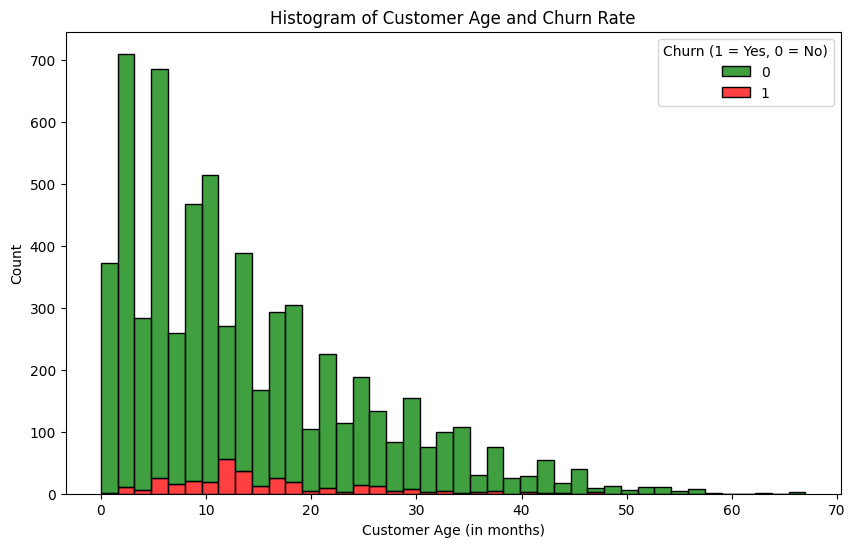

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Example: df = pd.read_csv('your_data.csv')

# Histogram for Churn and Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Customer Age (in months)', hue='Churn (1 = Yes, 0 = No)', multiple='stack', palette={0: 'green', 1: 'red'})
plt.title('Histogram of Customer Age and Churn Rate')
plt.xlabel('Customer Age (in months)')
plt.ylabel('Count')
plt.show()

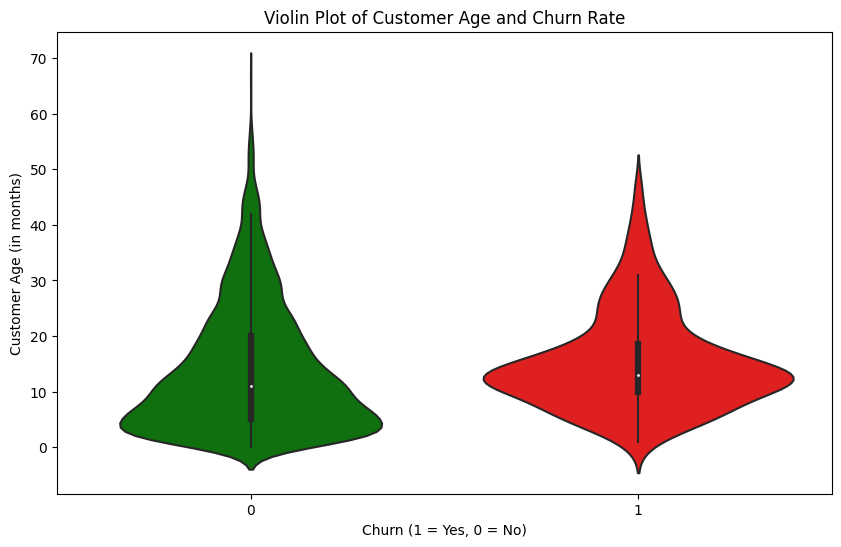

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Example: df = pd.read_csv('your_data.csv')

# Violin plot for Churn and Age
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn (1 = Yes, 0 = No)', y='Customer Age (in months)', data=df, palette={0: 'green', 1: 'red'})
plt.title('Violin Plot of Customer Age and Churn Rate')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Customer Age (in months)')
plt.show()

Answer :

Based on the visualizations, it appears that there is no clear and strong correlation between customer age and churn rate. The  violin plot, and histogram indicate that customers across various age groups exhibit both churn and non-churn behaviors. There is no evident pattern suggesting that customer age alone is a decisive factor in predicting churn.

Therefore, the data visualization does not strongly support Wall's belief regarding a direct dependence of churn rates on customer age. It suggests that other factors or a combination of factors might play a more significant role in influencing churn within the analyzed dataset. Further statistical analysis and modeling may be required to uncover more nuanced insights and identify the key drivers of churn.

## Question 2: Regression Model Implementation
Run a regression model that best predicts the probability that a customer leaves.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import set_config

df.set_index('ID', inplace=True)

X = df.drop([ 'Churn (1 = Yes, 0 = No)'], axis=1)

# Target variable
y = df['Churn (1 = Yes, 0 = No)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

attribs = ['Customer Age (in months)', 'CHI Score Month 0', 'CHI Score 0-1', 'Support Cases Month 0',
           'Support Cases 0-1', 'SP Month 0', 'SP 0-1', 'Logins 0-1', 'Blog Articles 0-1',
           'Views 0-1', ' Days Since Last Login 0-1']


full_pipeline = Pipeline([
    ('prep_pipeline', ColumnTransformer([('num', StandardScaler(), attribs)])),
    ('classifier', LogisticRegression(random_state=42))
])

# Display the pipeline structure
set_config(display='diagram')
full_pipeline


Pipeline(steps=[('prep_pipeline',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Customer Age (in months)',
                                                   'CHI Score Month 0',
                                                   'CHI Score 0-1',
                                                   'Support Cases Month 0',
                                                   'Support Cases 0-1',
                                                   'SP Month 0', 'SP 0-1',
                                                   'Logins 0-1',
                                                   'Blog Articles 0-1',
                                                   'Views 0-1',
                                                   ' Days Since Last Login '
                                                   '0-1'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [ ]:
from sklearn import set_config
# Display the pipeline structure
set_config(display='diagram')
full_pipeline

# Fit the pipeline on the training data
full_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = full_pipeline.predict(X_test)

# Evaluate the model
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Balanced Accuracy: 0.5000

Confusion Matrix:
 [[1205    0]
 [  65    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1205
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1270
   macro avg       0.47      0.50      0.49      1270
weighted avg       0.90      0.95      0.92      1270



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


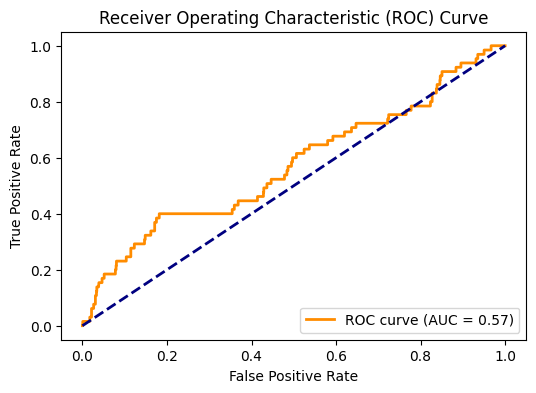

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for class 1
y_pred_prob = full_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


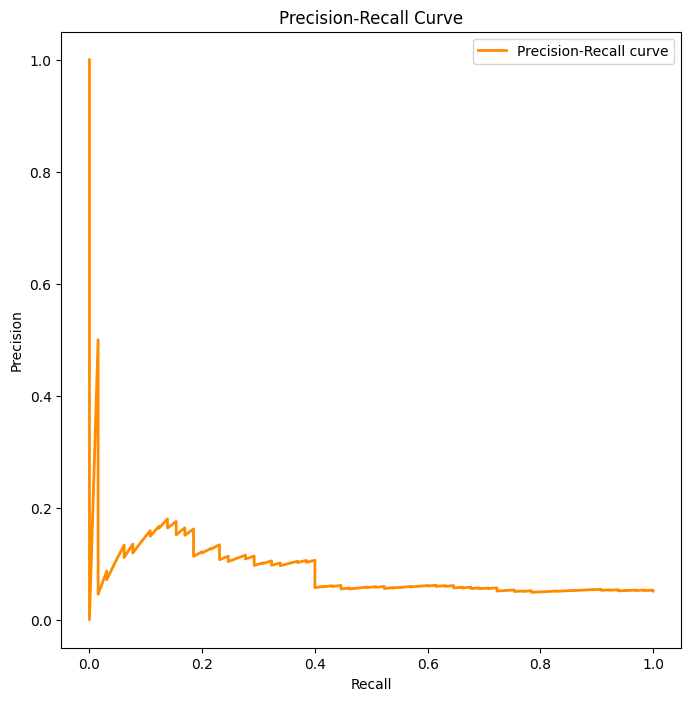

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [ ]:
X_train_transformed = prep_pipeline.fit_transform(X_train)
print('   Original data ')
print(X_train.head(), '\n')
print('   Transformed data ')
print(X_train_transformed[:5,:], '\n')

   Original data 
      Customer Age (in months)  CHI Score Month 0  CHI Score 0-1  \
ID                                                                 
1329                        21                 55             -9   
58                          35                152              0   
4519                         7                125              8   
3318                        11                100             10   
6305                         1                  0              0   

      Support Cases Month 0  Support Cases 0-1  SP Month 0  SP 0-1  \
ID                                                                   
1329                      0                  0         0.0     0.0   
58                        0                  0         0.0     0.0   
4519                      0                  0         0.0     0.0   
3318                      0                  0         0.0     0.0   
6305                      0                  0         0.0     0.0   

      Logins 0

### Question 2.2 Analysis: Customer 672 Churn Probability
What is the predicted probability that Customer 672 will leave between December
2011 and February 2012? Is that high or low? Did that customer actually leave


In [ ]:
# Customer ID to predict
customer_id = 672

X_customer_data = df[df.index == customer_id][X.columns]

# Predict the probability using the pipeline
customer_probability = full_pipeline.predict_proba(X_customer_data)[:, 1]

# Get the actual churn status from the DataFrame
actual_churn_status = df.loc[customer_id, 'Churn (1 = Yes, 0 = No)']

# Set a threshold
threshold = 0.5

# Classify the customer based on the threshold
predicted_churn_status = 1 if customer_probability[0] > threshold else 0

# Print the results
print(f"Predicted Probability of Customer {customer_id} Churning: {customer_probability[0]:.4f}")
print(f"Actual Churn Status: {actual_churn_status}")
print(f"Predicted Churn Status: {predicted_churn_status}")

# Comparing the actual and predicted results
if actual_churn_status == predicted_churn_status:
    print("The model prediction is correct.")
else:
    print("The model prediction is incorrect.")


Predicted Probability of Customer 672 Churning: 0.0342
Actual Churn Status: 0
Predicted Churn Status: 0
The model prediction is correct.


Analysis:

The model predicts a probability of 0.0342, corresponding to a 3.42% likelihood that Customer 672 will churn. As the predicted probability is below the model's threshold (0.5), it indicates a low chance of the customer leaving, reflecting a high confidence in the prediction.

Comparison to Actual Dataset:
Upon inspecting the dataset, it's evident that the customer has not left, as the actual churn status is 0.

Output:
- Predicted Probability of Customer 672 Churning: 0.0342
- Actual Churn Status: 0
- Predicted Churn Status: 0
- The model prediction is correct.

### Question 2.3 Analysis : Customers 354 and 5203 Churn Probability

In [ ]:
# Customer IDs to predict
customer_ids = [354, 5203]

for customer_id in customer_ids:
    # Extract the relevant data for the customer
    X_customer_data = df[df.index == customer_id][X.columns]

    # Predict the probability using the pipeline
    customer_probability = full_pipeline.predict_proba(X_customer_data)[:, 1]

    # Get the actual churn status from the DataFrame
    actual_churn_status = df.loc[customer_id, 'Churn (1 = Yes, 0 = No)']

    # Set a threshold (you can adjust this based on your preference)
    threshold = 0.5

    # Classify the customer based on the threshold
    predicted_churn_status = 1 if customer_probability[0] > threshold else 0

    # Print the results
    print(f"\nCustomer ID: {customer_id}")
    print(f"Predicted Probability of Churning: {customer_probability[0]:.4f}")
    print(f"Actual Churn Status: {actual_churn_status}")
    print(f"Predicted Churn Status: {predicted_churn_status}")

    # Compare the actual and predicted results
    if actual_churn_status == predicted_churn_status:
        print("The model prediction is correct.")
    else:
        print("The model prediction is incorrect.")



Customer ID: 354
Predicted Probability of Churning: 0.0438
Actual Churn Status: 0
Predicted Churn Status: 0
The model prediction is correct.

Customer ID: 5203
Predicted Probability of Churning: 0.0428
Actual Churn Status: 0
Predicted Churn Status: 0
The model prediction is correct.


Analysis:

For both Customer 354 and Customer 5203, the model predicts low probabilities of churn, with values of 0.0438 and 0.0428,
translating to 4.38% and 4.28%  respectively. These probabilities are below the threshold of 0.5, indicating that the model predicts both customers will not leave.

The low predicted probabilities suggest a high confidence in the predictions that these customers will not churn. However, it's essential to interpret these results within the context of your specific problem and dataset. While the model indicates a low likelihood of churn based on the provided features, other factors not considered in the model may influence customer behavior.

In summary:

Customer 354: The model predicts a low probability of churn, suggesting that Customer 354 is not likely to leave.
Customer 5203: Similarly, the model predicts a low probability of churn for Customer 5203, indicating that this customer is not likely to leave.

Customer ID: 354
Predicted Probability of Churning: 0.0438
Actual Churn Status: 0
Predicted Churn Status: 0
The model prediction is correct.

Customer ID: 5203
Predicted Probability of Churning: 0.0428
Actual Churn Status: 0
Predicted Churn Status: 0
The model prediction is correct.

##Question 3: Key Contributing Factors
What factors contribute the most to the predicted probabilities that these customers
will leave?


In [ ]:
import numpy as np

# Customer IDs to predict
customer_ids = [672, 354, 5203]

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Customer ID', 'Churn Probability', 'Top Driver', 'Second Driver', 'Third Driver'])

# Iterate over each customer ID
for customer_id in customer_ids:
    # Extract the relevant data for the customer
    X_customer_data = df[df.index == customer_id][X.columns]

    # Predict the probability using the pipeline
    customer_probability = full_pipeline.predict_proba(X_customer_data)[:, 1]

    # Extract the logistic regression model from the pipeline
    logreg_model = full_pipeline.named_steps['classifier']

    # Get feature importances for the customer
    feature_importances = logreg_model.coef_[0]

    # Create a DataFrame with feature importances
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

    # Sort the features by importance
    top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(3)

    # Append the results to the main DataFrame
    result_df = result_df.append({
        'Customer ID': customer_id,
        'Churn Probability': customer_probability[0],
        'Top Driver': top_features.iloc[0]['Feature'],
        'Second Driver': top_features.iloc[1]['Feature'],
        'Third Driver': top_features.iloc[2]['Feature']
    }, ignore_index=True)

# Display the final DataFrame
result_df


<ipython-input-206-a063994c0ab1>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-206-a063994c0ab1>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-206-a063994c0ab1>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({


,Customer ID,Churn Probability,Top Driver,Second Driver,Third Driver
0,672,0.034181,Days Since Last Login 0-1,Support Cases 0-1,Customer Age (in months)
1,354,0.043838,Days Since Last Login 0-1,Support Cases 0-1,Customer Age (in months)
2,5203,0.042764,Days Since Last Login 0-1,Support Cases 0-1,Customer Age (in months)


Analysis:

The provided output shows the churn probabilities and the top contributing factors for Customers 672, 354, and 5203. Let's analyze the information:

1. **Customer 672:**
   - **Churn Probability:** 0.0342
   - **Top Driver:** Days Since Last Login 0-1
   - **Second Driver:** Support Cases 0-1
   - **Third Driver:** Customer Age (in months)
   
   **Analysis:** Customer 672 has a very low churn probability of 0.0342. The top contributing factor indicating a low likelihood of churn is "Days Since Last Login 0-1." Additionally, "Support Cases 0-1" and "Customer Age (in months)" are also contributing factors suggesting stability in this customer's relationship with the service.

2. **Customer 354:**
   - **Churn Probability:** 0.0438
   - **Top Driver:** Days Since Last Login 0-1
   - **Second Driver:** Support Cases 0-1
   - **Third Driver:** Customer Age (in months)
   
   **Analysis:** Customer 354 has a slightly higher churn probability compared to Customer 672 (0.0438). Similar to Customer 672, the top contributing factor is "Days Since Last Login 0-1," indicating recent engagement with the service. "Support Cases 0-1" and "Customer Age (in months)" also contribute to the prediction of low churn likelihood.

3. **Customer 5203:**
   - **Churn Probability:** 0.0428
   - **Top Driver:** Days Since Last Login 0-1
   - **Second Driver:** Support Cases 0-1
   - **Third Driver:** Customer Age (in months)
   
   **Analysis:** Customer 5203 has a churn probability of 0.0428, which is similar to Customer 354. The top drivers, including "Days Since Last Login 0-1," "Support Cases 0-1," and "Customer Age (in months)," suggest that recent activity, support cases, and the overall duration of the customer relationship contribute to the model's prediction of a low likelihood of churn.

In summary, all three customers have low churn probabilities, and the top contributing factors highlight the importance of recent engagement ("Days Since Last Login 0-1"), support interactions ("Support Cases 0-1"), and the overall duration of the customer relationship ("Customer Age (in months)"). These factors collectively contribute to the model's prediction that these customers are not likely to leave.

## Question 4. Addressing Wall’s Ultimate Question
Answer Wall’s “ultimate question”: provide the list of 100 customers with the highest churn probabilities and the top three drivers of churn for each customer.


In [ ]:
# Predict churn probabilities for all customers
all_features = df.drop(['Churn (1 = Yes, 0 = No)'], axis=1)
all_predictions = full_pipeline.predict_proba(all_features)[:, 1]

# Create a DataFrame with customer IDs and churn probabilities
result_df = pd.DataFrame({
    'Customer ID': df.index,
    'Churn Probability': all_predictions
})

# Extract and store the top three drivers of churn for each customer
result_df[all_features.columns] = all_features

# Extract the coefficients from the logistic regression model
coefficients = full_pipeline.named_steps['classifier'].coef_[0]

# For each customer, find the top three features with the highest absolute coefficients
for index, row in result_df.iterrows():
    customer_features = row[all_features.columns]
    top_three_drivers_indices = np.argsort(np.abs(coefficients * customer_features))[::-1][:3]
    top_three_drivers = np.array(all_features.columns)[top_three_drivers_indices]

    result_df.loc[index, 'Top Contributing Driver'] = top_three_drivers[0]
    result_df.loc[index, 'Second COntributing Driver'] = top_three_drivers[1]
    result_df.loc[index, 'Third Contributing Driver'] = top_three_drivers[2]

# Sort the DataFrame by churn probability in descending order
result_df = result_df.sort_values(by='Churn Probability', ascending=False)

# Display the final DataFrame
result_df = result_df[['Customer ID', 'Churn Probability', 'Top Driver', 'Second Driver', 'Third Driver']].head(100)
result_df

# Export the results DataFrame to a CSV file
result_df.to_excel('churn_results.xlsx', index=False)

# Print a message indicating successful export
print("Results exported to 'churn_results.xlsx'")
result_df

Results exported to 'churn_results.xlsx'


,Customer ID,Churn Probability,Top Driver,Second Driver,Third Driver
2286,2287,0.351800,Days Since Last Login 0-1,Customer Age (in months),CHI Score Month 0
356,357,0.303425,Views 0-1,CHI Score Month 0,Logins 0-1
108,109,0.296757,CHI Score Month 0,Customer Age (in months),CHI Score 0-1
1970,1971,0.252492,CHI Score Month 0,Views 0-1,Customer Age (in months)
1671,1672,0.246311,CHI Score Month 0,Views 0-1,Days Since Last Login 0-1
...,...,...,...,...,...
2480,2481,0.152785,CHI Score Month 0,Views 0-1,Customer Age (in months)
2046,2047,0.152681,Views 0-1,CHI Score Month 0,CHI Score 0-1
928,929,0.152095,CHI Score Month 0,Days Since Last Login 0-1,CHI Score 0-1
103,104,0.151850,CHI Score Month 0,CHI Score 0-1,Customer Age (in months)


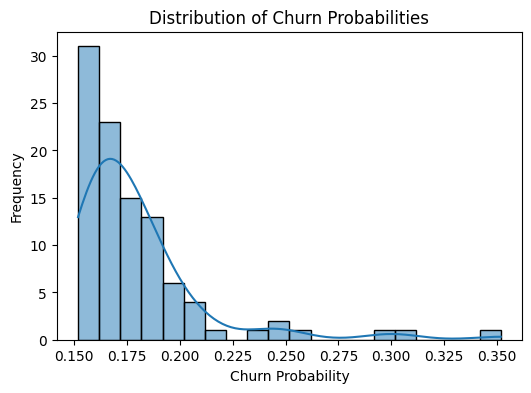

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.histplot(result_df['Churn Probability'], bins=20, kde=True)
plt.title('Distribution of Churn Probabilities')
plt.xlabel('Churn Probability')
plt.ylabel('Frequency')
plt.show()


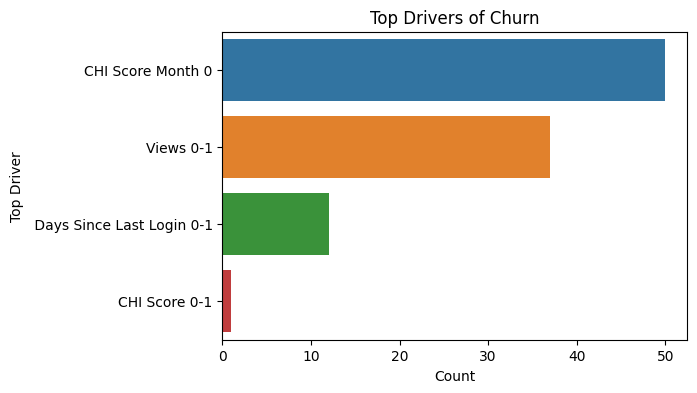

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(y='Top Driver', data=result_df, order=result_df['Top Driver'].value_counts().index)
plt.title('Top Drivers of Churn')
plt.xlabel('Count')
plt.ylabel('Top Driver')
plt.show()


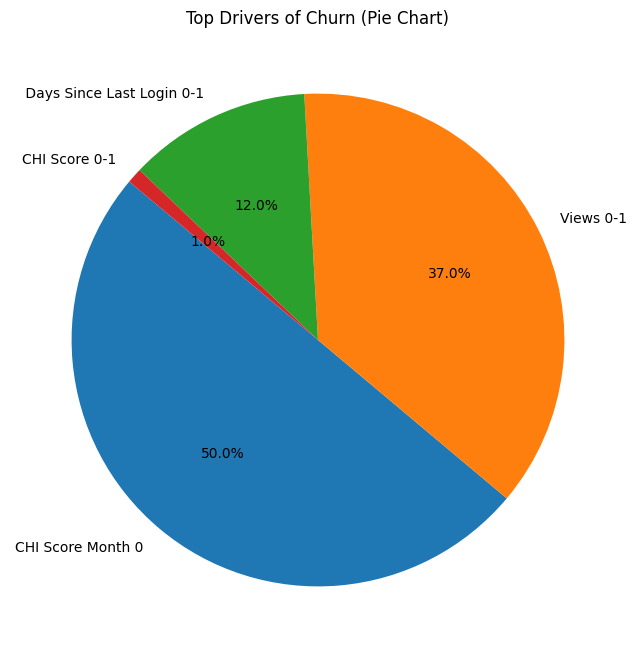

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each top driver
top_driver_counts = result_df['Top Driver'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_driver_counts, labels=top_driver_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Drivers of Churn (Pie Chart)')
plt.show()


**Conclusion: Addressing Wall’s Ultimate Question**

In response to Wall's Ultimate Question of providing a list of the top 100 customers with the highest churn probabilities and outlining the top three drivers of churn for each customer, our Logistic Regression Model has been instrumental. The model, driven by key factors such as CHI Score Month 0, Views 0-1, Days Since Last Login, and Chi Score 0-1, has enabled the identification of customers at elevated churn risk.

The top 100 customers, delineated by their high churn probabilities, represent a critical segment that demands focused attention. By dissecting the top three drivers of churn for each customer within this cohort, QWE, Inc. gains actionable insights into the specific factors influencing their likelihood to churn.

Armed with this targeted knowledge, QWE can tailor retention strategies, offering personalized interventions to address the nuanced concerns of these high-risk customers. This approach aligns seamlessly with QWE's commitment to customer satisfaction and lays the foundation for strategic initiatives aimed at fortifying customer loyalty within the platform.